# Correlation Analysis with Linear and Nonlinear RNNs

March 6, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy import stats, interpolate
from scipy import linalg as LA

# miscellaneous
from tqdm import tqdm
from itertools import cycle
from copy import deepcopy

import logging
import warnings
import dataclasses
from dataclasses import dataclass
from typing import Optional, List

import sys
sys.path.append("..")

In [2]:
from rnn import RNNparams, RNN
from task import Task
from simulation import Simulation
from algorithms.rflo import RFLO
from algorithms.bptt import BPTT
from algorithms.reinforce import REINFORCE
from algorithms.track_vars import TrackVars

from utils.plotting import plot_trained_trajectories
from utils.metric import cos_sim, flow_field_data, flow_field_predicted, calculate_flow_field_correlation
from utils.functions import f, df

In [4]:
# define f and df

def f_linear(x):
    return x

def df_linear(x):
    return 1

In [5]:
trial_duration = 20
n_in=4
frac_on = 0.4 # notice here the input duration - this usually makes the task easier

x_tonic = 0.0*np.ones((trial_duration, n_in)) # shape 20 x 4 i.e. time x channel
x_pulse1 = x_tonic.copy()
x_pulse2 = x_tonic.copy()
x_pulse3 = x_tonic.copy()
x_pulse4 = x_tonic.copy()
x_pulse1[0:int(trial_duration*frac_on),0] = 1
x_pulse2[0:int(trial_duration*frac_on),1] = 1
x_pulse3[0:int(trial_duration*frac_on),2] = 1
x_pulse4[0:int(trial_duration*frac_on),3] = 1

task1 = Task(x_in=x_pulse1,y_target=np.asarray([[1],[1]]))
task2 = Task(x_in=x_pulse2,y_target=np.asarray([[-1],[1]]))
task3 = Task(x_in=x_pulse3,y_target=np.asarray([[1],[-1]]))
task4 = Task(x_in=x_pulse4,y_target=np.asarray([[-1],[-1]]))

38it [00:00, 377.92it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132e96ea0>
corr coef:1.000


500it [00:00, 733.45it/s]
500it [00:01, 257.09it/s]
500it [00:00, 624.46it/s]


early fit 0.997, late fit 0.997


1000it [00:01, 858.09it/s]
65it [00:00, 648.32it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132e96828>
corr coef:0.739


500it [00:00, 723.08it/s]
500it [00:02, 236.21it/s]
500it [00:00, 657.73it/s]


early fit 0.997, late fit 0.998


1000it [00:01, 780.48it/s]
162it [00:00, 765.61it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc1321975a0>
corr coef:0.388


500it [00:00, 842.89it/s]
500it [00:01, 304.45it/s]
500it [00:00, 890.67it/s]


early fit 0.997, late fit 0.999


1000it [00:01, 560.34it/s]
69it [00:00, 678.70it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc1326d8798>
corr coef:1.000


500it [00:00, 741.94it/s]
500it [00:01, 281.61it/s]
500it [00:00, 909.45it/s]


early fit 0.996, late fit 0.996


1000it [00:01, 840.97it/s]
29it [00:00, 286.30it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132e96990>
corr coef:0.733


500it [00:00, 530.89it/s]
500it [00:01, 273.33it/s]
500it [00:00, 905.04it/s]


early fit 0.996, late fit 0.997


1000it [00:01, 888.32it/s]
75it [00:00, 749.38it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc130697708>
corr coef:0.378


500it [00:00, 851.12it/s]
500it [00:03, 146.38it/s]
500it [00:00, 537.69it/s]


early fit 0.996, late fit 0.998


1000it [00:01, 895.76it/s]
75it [00:00, 740.49it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132174ca8>
corr coef:1.000


500it [00:00, 722.48it/s]
500it [00:03, 161.26it/s]
500it [00:00, 720.81it/s]


early fit 0.996, late fit 0.996


1000it [00:02, 447.03it/s]
23it [00:00, 191.03it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132029ca8>
corr coef:0.780


500it [00:02, 234.47it/s]
500it [00:03, 162.53it/s]
500it [00:00, 573.69it/s]


early fit 0.996, late fit 0.997


1000it [00:01, 555.55it/s]
52it [00:00, 517.58it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc130712c18>
corr coef:0.483


500it [00:01, 342.84it/s]
500it [00:02, 246.83it/s]
500it [00:00, 615.54it/s]


early fit 0.996, late fit 0.997


1000it [00:02, 426.78it/s]


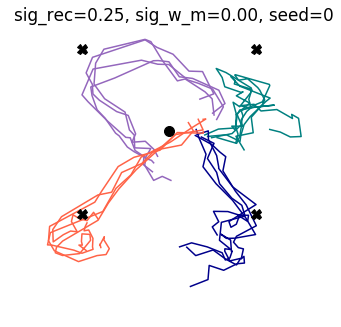

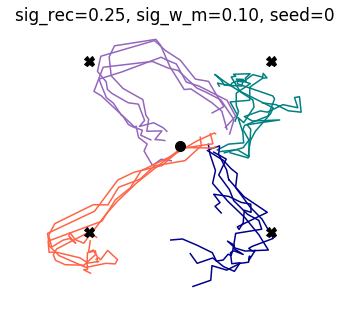

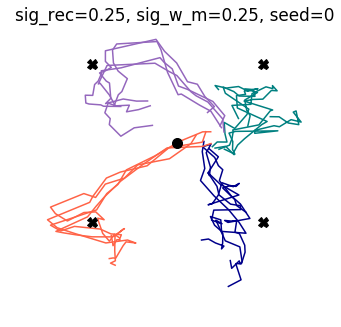

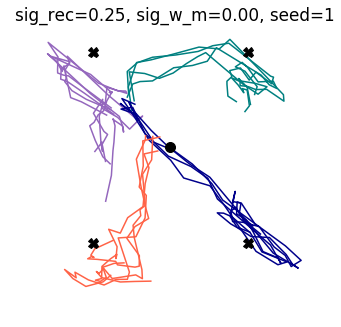

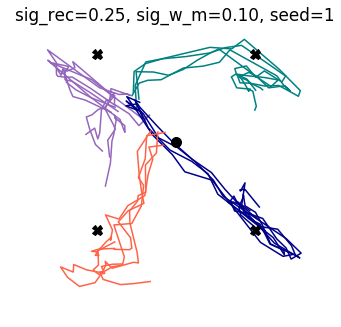

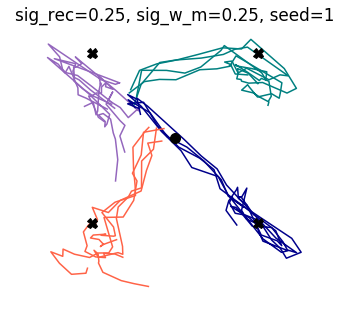

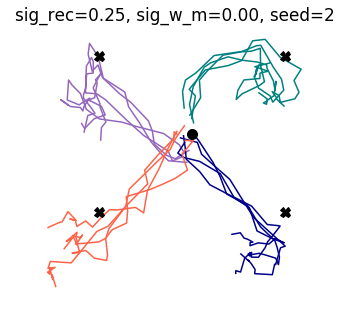

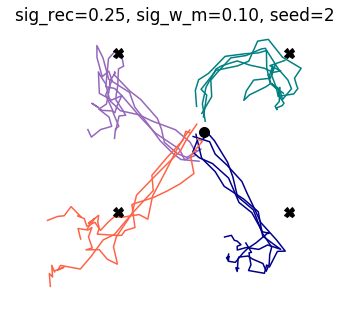

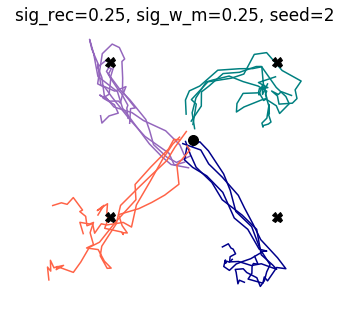

In [23]:
#noise = [0, 0.1,0.25,0.5, 1] #,1]

#noise = [0.01, 0.1,0.25,0.5]

sig_w_m=0.5
sig_rec = 0.25
sig_out=0.01
noise = [0, 0.1,0.25] # 
#neurons = [50,100,150,200]
n_rec = 100

""" Average over multiple seeds """
seeds = [0,1,2]

stats = {}
stats['corr1'] = []
stats['corr2'] = []
stats['corrcoef'] = []

for seed in seeds:

    corr1_list = []
    corr2_list = []
    corrcoef_list = []

    #for sig_out in noise:
    for sig_w_m in noise:

        # Set RNN Parameters
        params = RNNparams(n_in=4,n_rec=n_rec,n_out=2,tau_rec=5,
                       eta_in=0.1,eta_rec=0.1,eta_out=0.1,
                       sig_in=0.01,sig_rec=sig_rec,sig_out=sig_out,
                       velocity_transform=False,
                       rng=np.random.RandomState(seed))
        params.print_params()

        # Initialize RNN
        net0 = RNN(params,f=f_linear,df=df_linear)
        # set w_m matrix (with noise)
        w_m = np.copy(net0.w_out.T) + sig_w_m*np.random.RandomState(0).randn(net0.w_out.T.shape[0],net0.w_out.T.shape[1])  # << keep random value constant, SHOULD NORMALIZE HERE

        corrcoef = np.corrcoef(w_m.T.ravel(),net0.w_out.ravel())[0,1]
        print('corr coef:{:.3f}'.format(corrcoef))
        corrcoef_list.append(corrcoef)
        net0.set_weights(w_m = w_m)

        # initialize simulation
        sim0 = Simulation(net0)
        trackvars = TrackVars(net0,apply_to=[]) 
        #reinforce = REINFORCE(net0,apply_to=['w_rec'],online=False,tau_reward=5) # weight transport only applies when w_out is being learned

        sim0.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=False, plot_freq=10)

        sim1 = Simulation(net0)
        """ RFLO """
        rflo = RFLO(net0,apply_to=['w_rec']) 
        sim1.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['h','y_out','err','pos'], plot=False, plot_freq=10)

    #     """ BPTT """
    #     bptt = BPTT(net0,apply_to=['w_rec']) # weight transport only applies when w_out is being learned
    #     sim1.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[bptt], probe_types=['h','y_out','err','pos'], plot=True, plot_freq=10)

        """ REINFORCE """
        #reinforce = REINFORCE(net0,apply_to=['w_rec'],online=False,tau_reward=5) # weight transport only applies when w_out is being learned
        #sim1.run_session(n_trials=5000, tasks=[task1,task2,task3,task4], learn_alg=[reinforce], probe_types=['h','y_out','err','pos'], plot=True, plot_freq=50)

        fig = plot_trained_trajectories(sim=sim1, tasks=[task1,task2,task3,task4],title='sig_rec={:.2f}, sig_w_m={:.2f}, seed={}'.format(sig_rec,sig_w_m,seed))


        sim2 = Simulation(net0)
        trackvars = TrackVars(net0,apply_to=[]) 
        #reinforce = REINFORCE(net0,apply_to=['w_rec'],online=False,tau_reward=5) # weight transport only applies when w_out is being learned

        sim2.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=False, plot_freq=10)




        """ Calculate F fields """
        F_early, score_early = flow_field_data(sim0.session_probes['h'])
        F_late, score_late = flow_field_data(sim2.session_probes['h'])

        print('early fit {:.3f}, late fit {:.3f}'.format(score_early,score_late))

        Fdata = F_late - F_early

        Fpred_w_out = flow_field_predicted(net0.w_out,sim1.session_probes['err'],sim1.session_probes['h'])
        Fpred_w_m = flow_field_predicted(net0.w_m.T,sim1.session_probes['err'],sim1.session_probes['h'])


        """ Test """
        # Should this be a different network?
    #     sim_test = Simulation(net0)
    #     trackvars = TrackVars(net0,apply_to=[]) 
    #     sim_test.run_session(n_trials=1000, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=True, plot_freq=10)

        """ Test """
        # Should this be a different network?
        # Set RNN Parameters
        params_test = RNNparams(n_in=4,n_rec=n_rec,n_out=2,tau_rec=8,
                       eta_in=0.1,eta_rec=0.1,eta_out=0.1,eta_fb=0.5,
                       sig_in=0.0,sig_rec=0.5,sig_out=0.1, sig_fb=0.0,
                       velocity_transform=False, tau_vel = 2, dt_vel = 0.1,
                       driving_feedback=False,
                       rng=np.random.RandomState(seed+10)) # note different seed
        #params_test.print_params()

        # Initialize RNN to sample new points in neural activity space
        net_test = RNN(params_test)
        net_test.set_weights(w_in=np.copy(net0.w_in),w_rec=np.copy(net0.w_rec),w_out=np.copy(net0.w_out),w_m=np.copy(net0.w_m))

        sim_test = Simulation(net_test)
        trackvars = TrackVars(net_test,apply_to=[]) 
        sim_test.run_session(n_trials=1000, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=False, plot_freq=10)


        corr1 = calculate_flow_field_correlation(Fpred_w_out,Fdata,sim_test.session_probes['h']) # sample different points in neural activity space
        corr1_list.append(corr1)

        corr2 = calculate_flow_field_correlation(Fpred_w_m,Fdata,sim_test.session_probes['h']) # sample different points in neural activity space
        corr2_list.append(corr2)
        
        
        
        
    # update
    stats['corr1'].append(corr1_list)
    stats['corr2'].append(corr2_list)
    stats['corrcoef'].append(corrcoef_list)

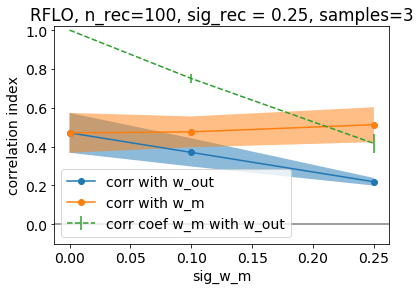

In [24]:
""" take mean and std """
mn1 = np.mean(np.asarray(stats['corr1']),axis=0)
mn2 = np.mean(np.asarray(stats['corr2']),axis=0)
std1 = np.std(np.asarray(stats['corr1']),axis=0)
std2 = np.std(np.asarray(stats['corr2']),axis=0)

plt.plot(noise,mn1,'o-',label='corr with w_out')
plt.fill_between(noise,mn1-std1,mn1+std1,alpha=0.5)
plt.plot(noise,mn2,'o-',label='corr with w_m')
plt.fill_between(noise,mn2-std2,mn2+std2,alpha=0.5)

# readout alignment
mn3 = np.mean(np.asarray(stats['corrcoef']),axis=0)
std3 = np.std(np.asarray(stats['corrcoef']),axis=0)
#plt.plot(neurons,mn3,'x--',label='corr coef w_m with w_out')
plt.errorbar(noise,mn3,yerr=std3,label='corr coef w_m with w_out',linestyle='--')

plt.axhline(0,color='k',alpha=0.5)

#plt.xlabel('sig_rec')
#plt.xlabel('sig_out')
plt.xlabel('sig_w_m')
#plt.xlabel('number of recurrent units')
plt.ylabel('correlation index')
plt.ylim([-0.1,1.02])
plt.title('RFLO, n_rec={}, sig_rec = {}, samples={}'.format(n_rec,sig_rec,len(stats['corr1'])))
plt.legend()
plt.show()

# Nonlinear Network

59it [00:00, 589.96it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132e91c18>
corr coef:1.000


500it [00:00, 809.05it/s]
500it [00:02, 244.50it/s]
500it [00:00, 741.52it/s]


early fit 0.963, late fit 0.969


1000it [00:01, 938.79it/s]
63it [00:00, 624.36it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132eba1b0>
corr coef:0.739


500it [00:00, 807.07it/s]
500it [00:02, 241.92it/s]
500it [00:00, 1007.54it/s]


early fit 0.963, late fit 0.975


1000it [00:01, 810.76it/s]
84it [00:00, 834.26it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc135850c18>
corr coef:0.388


500it [00:00, 648.05it/s]
500it [00:01, 265.18it/s]
500it [00:00, 724.74it/s]


early fit 0.963, late fit 0.985


1000it [00:01, 791.56it/s]
97it [00:00, 968.38it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc130ceea68>
corr coef:1.000


500it [00:00, 903.98it/s]
500it [00:01, 267.99it/s]
500it [00:00, 1077.80it/s]


early fit 0.962, late fit 0.969


1000it [00:00, 1068.34it/s]
98it [00:00, 971.44it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc138a22d80>
corr coef:0.733


500it [00:00, 1041.43it/s]
500it [00:01, 303.33it/s]
500it [00:00, 893.08it/s]


early fit 0.962, late fit 0.973


1000it [00:01, 985.16it/s]
97it [00:00, 964.12it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc130ceec18>
corr coef:0.378


500it [00:00, 894.89it/s]
500it [00:02, 238.30it/s]
500it [00:00, 914.43it/s]


early fit 0.962, late fit 0.983


1000it [00:00, 1038.42it/s]
107it [00:00, 1064.37it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc130cea990>
corr coef:1.000


500it [00:00, 1032.16it/s]
500it [00:01, 295.76it/s]
500it [00:00, 1075.65it/s]


early fit 0.962, late fit 0.971


1000it [00:00, 1066.75it/s]
94it [00:00, 935.87it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132009c18>
corr coef:0.780


500it [00:00, 985.83it/s]
500it [00:01, 297.23it/s]
500it [00:00, 1037.59it/s]


early fit 0.962, late fit 0.971


1000it [00:01, 982.70it/s]
94it [00:00, 935.74it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.01
sig_rec: 0.25
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: None
dt_vel: None
rng: <mtrand.RandomState object at 0x7fc132e8a558>
corr coef:0.483


500it [00:00, 1036.92it/s]
500it [00:01, 301.50it/s]
500it [00:00, 1064.48it/s]


early fit 0.962, late fit 0.978


1000it [00:00, 1033.81it/s]


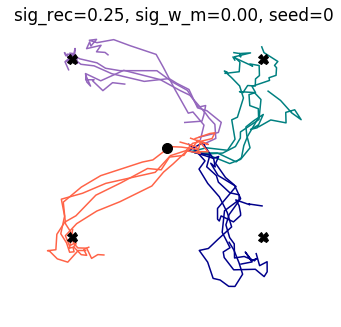

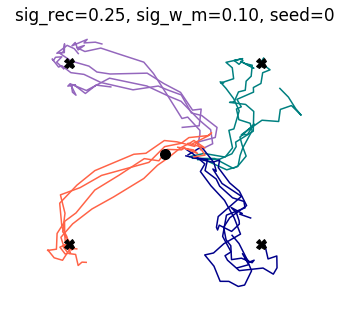

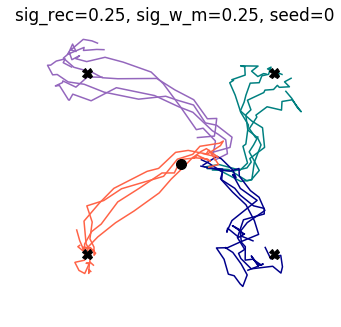

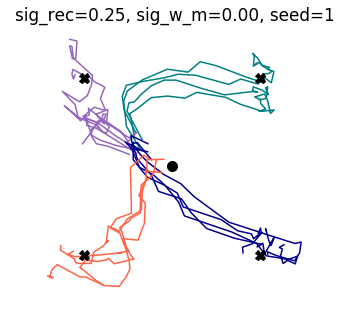

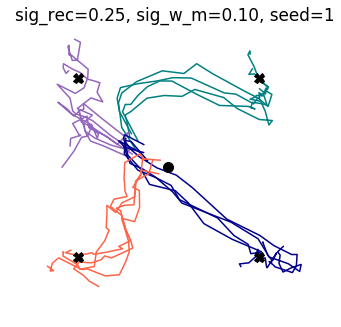

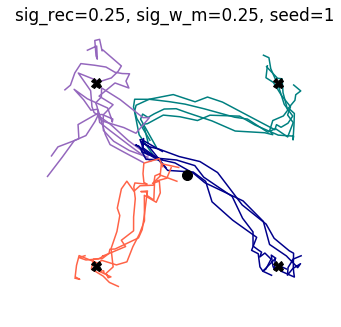

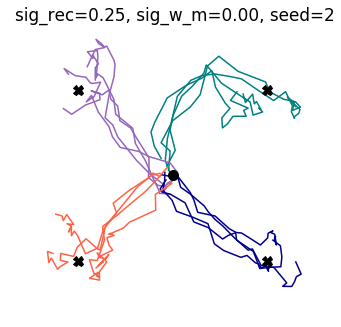

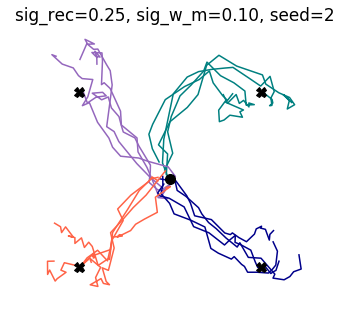

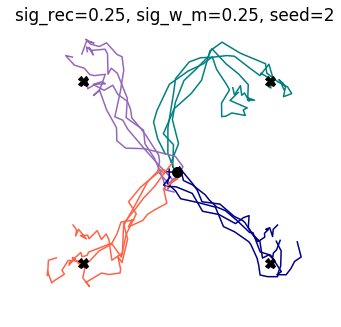

In [25]:
#noise = [0, 0.1,0.25,0.5, 1] #,1]

#noise = [0.01, 0.1,0.25,0.5]

sig_w_m=0.5
sig_rec = 0.25
sig_out=0.01
noise = [0, 0.1,0.25]#0.5,0.75, 1] 
#neurons = [50,100,150,200]
n_rec = 100

""" Average over multiple seeds """
seeds = [0,1,2]

stats = {}
stats['corr1'] = []
stats['corr2'] = []
stats['corrcoef'] = []

for seed in seeds:

    corr1_list = []
    corr2_list = []
    corrcoef_list = []

    #for sig_out in noise:
    for sig_w_m in noise:

        # Set RNN Parameters
        params = RNNparams(n_in=4,n_rec=n_rec,n_out=2,tau_rec=5,
                       eta_in=0.1,eta_rec=0.1,eta_out=0.1,
                       sig_in=0.01,sig_rec=sig_rec,sig_out=sig_out,
                       velocity_transform=False,
                       rng=np.random.RandomState(seed))
        params.print_params()

        # Initialize RNN
        net0 = RNN(params)
        # set w_m matrix (with noise)
        w_m = np.copy(net0.w_out.T) + sig_w_m*np.random.RandomState(0).randn(net0.w_out.T.shape[0],net0.w_out.T.shape[1])  # << keep random value constant, SHOULD NORMALIZE HERE

        corrcoef = np.corrcoef(w_m.T.ravel(),net0.w_out.ravel())[0,1]
        print('corr coef:{:.3f}'.format(corrcoef))
        corrcoef_list.append(corrcoef)
        net0.set_weights(w_m = w_m)

        # initialize simulation
        sim0 = Simulation(net0)
        trackvars = TrackVars(net0,apply_to=[]) 
        #reinforce = REINFORCE(net0,apply_to=['w_rec'],online=False,tau_reward=5) # weight transport only applies when w_out is being learned

        sim0.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=False, plot_freq=10)

        sim1 = Simulation(net0)
        """ RFLO """
        rflo = RFLO(net0,apply_to=['w_rec']) 
        sim1.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['h','y_out','err','pos'], plot=False, plot_freq=10)

    #     """ BPTT """
    #     bptt = BPTT(net0,apply_to=['w_rec']) # weight transport only applies when w_out is being learned
    #     sim1.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[bptt], probe_types=['h','y_out','err','pos'], plot=True, plot_freq=10)

        """ REINFORCE """
        #reinforce = REINFORCE(net0,apply_to=['w_rec'],online=False,tau_reward=5) # weight transport only applies when w_out is being learned
        #sim1.run_session(n_trials=5000, tasks=[task1,task2,task3,task4], learn_alg=[reinforce], probe_types=['h','y_out','err','pos'], plot=True, plot_freq=50)

        fig = plot_trained_trajectories(sim=sim1, tasks=[task1,task2,task3,task4],title='sig_rec={:.2f}, sig_w_m={:.2f}, seed={}'.format(sig_rec,sig_w_m,seed))


        sim2 = Simulation(net0)
        trackvars = TrackVars(net0,apply_to=[]) 
        #reinforce = REINFORCE(net0,apply_to=['w_rec'],online=False,tau_reward=5) # weight transport only applies when w_out is being learned

        sim2.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=False, plot_freq=10)




        """ Calculate F fields """
        F_early, score_early = flow_field_data(sim0.session_probes['h'])
        F_late, score_late = flow_field_data(sim2.session_probes['h'])

        print('early fit {:.3f}, late fit {:.3f}'.format(score_early,score_late))

        Fdata = F_late - F_early

        Fpred_w_out = flow_field_predicted(net0.w_out,sim1.session_probes['err'],sim1.session_probes['h'])
        Fpred_w_m = flow_field_predicted(net0.w_m.T,sim1.session_probes['err'],sim1.session_probes['h'])


        """ Test """
        # Should this be a different network?
    #     sim_test = Simulation(net0)
    #     trackvars = TrackVars(net0,apply_to=[]) 
    #     sim_test.run_session(n_trials=1000, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=True, plot_freq=10)

        """ Test """
        # Should this be a different network?
        # Set RNN Parameters
        params_test = RNNparams(n_in=4,n_rec=n_rec,n_out=2,tau_rec=8,
                       eta_in=0.1,eta_rec=0.1,eta_out=0.1,eta_fb=0.5,
                       sig_in=0.0,sig_rec=0.5,sig_out=0.1, sig_fb=0.0,
                       velocity_transform=False, tau_vel = 2, dt_vel = 0.1,
                       driving_feedback=False,
                       rng=np.random.RandomState(seed+10)) # note different seed
        #params_test.print_params()

        # Initialize RNN to sample new points in neural activity space
        net_test = RNN(params_test)
        net_test.set_weights(w_in=np.copy(net0.w_in),w_rec=np.copy(net0.w_rec),w_out=np.copy(net0.w_out),w_m=np.copy(net0.w_m))

        sim_test = Simulation(net_test)
        trackvars = TrackVars(net_test,apply_to=[]) 
        sim_test.run_session(n_trials=1000, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h'], plot=False, plot_freq=10)


        corr1 = calculate_flow_field_correlation(Fpred_w_out,Fdata,sim_test.session_probes['h']) # sample different points in neural activity space
        corr1_list.append(corr1)

        corr2 = calculate_flow_field_correlation(Fpred_w_m,Fdata,sim_test.session_probes['h']) # sample different points in neural activity space
        corr2_list.append(corr2)
        
        
        
        
    # update
    stats['corr1'].append(corr1_list)
    stats['corr2'].append(corr2_list)
    stats['corrcoef'].append(corrcoef_list)

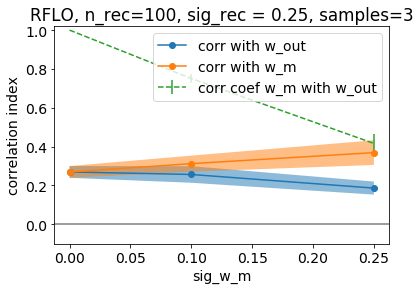

In [27]:
""" take mean and std """
mn1 = np.mean(np.asarray(stats['corr1']),axis=0)
mn2 = np.mean(np.asarray(stats['corr2']),axis=0)
std1 = np.std(np.asarray(stats['corr1']),axis=0)
std2 = np.std(np.asarray(stats['corr2']),axis=0)

plt.plot(noise,mn1,'o-',label='corr with w_out')
plt.fill_between(noise,mn1-std1,mn1+std1,alpha=0.5)
plt.plot(noise,mn2,'o-',label='corr with w_m')
plt.fill_between(noise,mn2-std2,mn2+std2,alpha=0.5)

# readout alignment
mn3 = np.mean(np.asarray(stats['corrcoef']),axis=0)
std3 = np.std(np.asarray(stats['corrcoef']),axis=0)
#plt.plot(neurons,mn3,'x--',label='corr coef w_m with w_out')
plt.errorbar(noise,mn3,yerr=std3,label='corr coef w_m with w_out',linestyle='--')

plt.axhline(0,color='k',alpha=0.5)

#plt.xlabel('sig_rec')
#plt.xlabel('sig_out')
plt.xlabel('sig_w_m')
#plt.xlabel('number of recurrent units')
plt.ylabel('correlation index')
plt.ylim([-0.1,1.02])
plt.title('RFLO, n_rec={}, sig_rec = {}, samples={}'.format(n_rec,sig_rec,len(stats['corr1'])))
plt.legend()
plt.show()